In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv("D:\\Test\\rear_axle_failure_realistic_v2.csv")

In [3]:
df.shape

(3000, 42)

In [4]:
df.head()

,Vehicle_ID,Load_Torque(Nm),Speed(RPM),Lubricant_Temp(°C),Oil_Viscosity(cSt),Axle_Age(km),Road_Type,Shock_Load,Manufacturing_Batch,Maintenance_Gap(km),...,Pressure_Angle_deg,Profile_Shift,Contact_Ratio,Backlash_mm,Material_Grade,Case_Depth_mm,Surface_Hardness_HRC,Runout_mm,Housing_Stiffness_index,Failure
0,V1983,543.100696,1221.274885,96.040417,78.050255,70449.294374,Highway,Low,197,10695.174868,...,21.129952,0.109043,1.436095,0.278446,High,1.192925,54.949982,0.044101,0.711093,0
1,V2333,668.039660,1380.326795,77.831131,71.652313,87099.559397,Rough,Medium,130,20381.136882,...,17.395862,0.212505,1.563832,0.149512,Low,1.813430,53.742694,0.006848,0.743448,0
2,V1488,1118.714164,1856.657574,106.149782,71.395555,167896.875288,Highway,High,171,24942.045087,...,23.270119,0.193616,1.326842,0.327659,Low,1.085269,46.187498,0.072717,0.565620,1
3,V2153,817.691021,1526.808858,135.115566,55.931148,196191.888719,Off-road,High,196,25405.528724,...,22.199089,0.059858,1.106061,0.357469,Medium,0.955921,43.996669,0.081827,0.690110,1
4,V1251,569.994822,1521.311447,69.079577,80.262811,94708.618024,Highway,Low,112,11395.858036,...,19.979232,0.140376,1.355646,0.217812,High,1.433869,59.623449,0.063630,0.637878,0


In [5]:
df.columns

Index(['Vehicle_ID', 'Load_Torque(Nm)', 'Speed(RPM)', 'Lubricant_Temp(°C)',
       'Oil_Viscosity(cSt)', 'Axle_Age(km)', 'Road_Type', 'Shock_Load',
       'Manufacturing_Batch', 'Maintenance_Gap(km)', 'Noise_Level(dB)',
       'Vibration(mm/s)', 'Temperature_Rise(°C)', 'Torque_Speed_Ratio',
       'Aging_Factor', 'Thermal_Stress_Index', 'Ambient_Temp(°C)',
       'Humidity(%)', 'Dust_Level', 'Altitude(m)', 'Rain_Exposure',
       'Road_Roughness(m/s²)', 'Vehicle_Load(kg)', 'Brake_Usage_Freq(/100km)',
       'Oil_Contamination_Index', 'Lubrication_Efficiency',
       'Shock_Severity_Index', 'Cumulative_Damage_Index', 'Load_Factor',
       'Module_mm', 'Pinion_Teeth', 'Face_Width_mm', 'Pressure_Angle_deg',
       'Profile_Shift', 'Contact_Ratio', 'Backlash_mm', 'Material_Grade',
       'Case_Depth_mm', 'Surface_Hardness_HRC', 'Runout_mm',
       'Housing_Stiffness_index', 'Failure'],
      dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle_ID                3000 non-null   object 
 1   Load_Torque(Nm)           3000 non-null   float64
 2   Speed(RPM)                3000 non-null   float64
 3   Lubricant_Temp(°C)        3000 non-null   float64
 4   Oil_Viscosity(cSt)        3000 non-null   float64
 5   Axle_Age(km)              3000 non-null   float64
 6   Road_Type                 3000 non-null   object 
 7   Shock_Load                3000 non-null   object 
 8   Manufacturing_Batch       3000 non-null   int64  
 9   Maintenance_Gap(km)       3000 non-null   float64
 10  Noise_Level(dB)           3000 non-null   float64
 11  Vibration(mm/s)           3000 non-null   float64
 12  Temperature_Rise(°C)      3000 non-null   float64
 13  Torque_Speed_Ratio        3000 non-null   float64
 14  Aging_Fa

In [7]:
import pandas as pd

# 🧹 Step 1: Try to convert numeric-looking object columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# 🧠 Step 2: Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# 🧾 Step 3: Print counts and names
print("===============================================")
print(f"🟣 Total Categorical Columns: {len(cat_cols)}")
print("Categorical Columns:")
for col in cat_cols:
    print(f"  - {col}")

print("\n===============================================")
print(f"🔵 Total Numerical Columns: {len(num_cols)}")
print("Numerical Columns:")
for col in num_cols:
    print(f"  - {col}")

print("===============================================")

🟣 Total Categorical Columns: 7
Categorical Columns:
  - Vehicle_ID
  - Road_Type
  - Shock_Load
  - Dust_Level
  - Rain_Exposure
  - Load_Factor
  - Material_Grade

🔵 Total Numerical Columns: 35
Numerical Columns:
  - Load_Torque(Nm)
  - Speed(RPM)
  - Lubricant_Temp(°C)
  - Oil_Viscosity(cSt)
  - Axle_Age(km)
  - Manufacturing_Batch
  - Maintenance_Gap(km)
  - Noise_Level(dB)
  - Vibration(mm/s)
  - Temperature_Rise(°C)
  - Torque_Speed_Ratio
  - Aging_Factor
  - Thermal_Stress_Index
  - Ambient_Temp(°C)
  - Humidity(%)
  - Altitude(m)
  - Road_Roughness(m/s²)
  - Vehicle_Load(kg)
  - Brake_Usage_Freq(/100km)
  - Oil_Contamination_Index
  - Lubrication_Efficiency
  - Shock_Severity_Index
  - Cumulative_Damage_Index
  - Module_mm
  - Pinion_Teeth
  - Face_Width_mm
  - Pressure_Angle_deg
  - Profile_Shift
  - Contact_Ratio
  - Backlash_mm
  - Case_Depth_mm
  - Surface_Hardness_HRC
  - Runout_mm
  - Housing_Stiffness_index
  - Failure


In [8]:
df = df.drop(columns=["Manufacturing_Batch", "Vehicle_ID"], errors='ignore')

In [9]:
import pandas as pd

# 🧹 Step 1: Try to convert numeric-looking object columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# 🧠 Step 2: Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# 🧾 Step 3: Print counts and names
print("===============================================")
print(f"🟣 Total Categorical Columns: {len(cat_cols)}")
print("Categorical Columns:")
for col in cat_cols:
    print(f"  - {col}")

print("\n===============================================")
print(f"🔵 Total Numerical Columns: {len(num_cols)}")
print("Numerical Columns:")
for col in num_cols:
    print(f"  - {col}")

print("===============================================")

🟣 Total Categorical Columns: 6
Categorical Columns:
  - Road_Type
  - Shock_Load
  - Dust_Level
  - Rain_Exposure
  - Load_Factor
  - Material_Grade

🔵 Total Numerical Columns: 34
Numerical Columns:
  - Load_Torque(Nm)
  - Speed(RPM)
  - Lubricant_Temp(°C)
  - Oil_Viscosity(cSt)
  - Axle_Age(km)
  - Maintenance_Gap(km)
  - Noise_Level(dB)
  - Vibration(mm/s)
  - Temperature_Rise(°C)
  - Torque_Speed_Ratio
  - Aging_Factor
  - Thermal_Stress_Index
  - Ambient_Temp(°C)
  - Humidity(%)
  - Altitude(m)
  - Road_Roughness(m/s²)
  - Vehicle_Load(kg)
  - Brake_Usage_Freq(/100km)
  - Oil_Contamination_Index
  - Lubrication_Efficiency
  - Shock_Severity_Index
  - Cumulative_Damage_Index
  - Module_mm
  - Pinion_Teeth
  - Face_Width_mm
  - Pressure_Angle_deg
  - Profile_Shift
  - Contact_Ratio
  - Backlash_mm
  - Case_Depth_mm
  - Surface_Hardness_HRC
  - Runout_mm
  - Housing_Stiffness_index
  - Failure


In [10]:
df.shape

(3000, 40)

In [11]:
df.isnull().sum()

Load_Torque(Nm)             0
Speed(RPM)                  0
Lubricant_Temp(°C)          0
Oil_Viscosity(cSt)          0
Axle_Age(km)                0
Road_Type                   0
Shock_Load                  0
Maintenance_Gap(km)         0
Noise_Level(dB)             0
Vibration(mm/s)             0
Temperature_Rise(°C)        0
Torque_Speed_Ratio          0
Aging_Factor                0
Thermal_Stress_Index        0
Ambient_Temp(°C)            0
Humidity(%)                 0
Dust_Level                  0
Altitude(m)                 0
Rain_Exposure               0
Road_Roughness(m/s²)        0
Vehicle_Load(kg)            0
Brake_Usage_Freq(/100km)    0
Oil_Contamination_Index     0
Lubrication_Efficiency      0
Shock_Severity_Index        0
Cumulative_Damage_Index     0
Load_Factor                 0
Module_mm                   0
Pinion_Teeth                0
Face_Width_mm               0
Pressure_Angle_deg          0
Profile_Shift               0
Contact_Ratio               0
Backlash_m

In [12]:
df.describe()

,Load_Torque(Nm),Speed(RPM),Lubricant_Temp(°C),Oil_Viscosity(cSt),Axle_Age(km),Maintenance_Gap(km),Noise_Level(dB),Vibration(mm/s),Temperature_Rise(°C),Torque_Speed_Ratio,...,Face_Width_mm,Pressure_Angle_deg,Profile_Shift,Contact_Ratio,Backlash_mm,Case_Depth_mm,Surface_Hardness_HRC,Runout_mm,Housing_Stiffness_index,Failure
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,771.784025,1559.346714,94.881943,74.920158,125258.682872,17186.972485,79.870483,7.795181,33.089224,0.579192,...,71.856333,21.173821,0.139066,1.438305,0.260579,1.199040,52.841295,0.050151,0.682220,0.40000
std,178.309646,279.032016,15.979815,16.080507,48540.394339,7071.015921,10.899706,3.968326,11.039925,0.111842,...,10.892710,2.124521,0.087975,0.219408,0.088219,0.316067,7.060960,0.031644,0.177475,0.48998
min,334.774616,665.078732,51.126541,28.232962,21743.262372,2470.012337,57.524747,-2.554480,11.120387,0.332160,...,42.249152,14.614326,-0.125370,0.878820,0.028987,0.230660,36.316597,-0.039152,0.157681,0.00000
25%,630.277466,1348.513949,82.760397,62.566666,85145.544964,11307.414122,70.724031,4.570282,23.953288,0.486661,...,61.662532,19.615336,0.064694,1.234638,0.191246,0.949815,46.018343,0.025533,0.533487,0.00000
50%,740.832083,1541.370994,93.064802,76.725413,109072.662169,14895.876419,76.692078,6.857347,29.816736,0.545954,...,74.860221,21.114900,0.154051,1.499217,0.246408,1.233523,55.116739,0.047116,0.712879,0.00000
75%,923.072270,1762.689922,107.002022,87.406186,173062.605928,24146.443782,90.146480,11.385979,43.613892,0.683873,...,80.706637,22.714695,0.207311,1.617893,0.334355,1.444392,58.716371,0.075237,0.823513,1.00000
max,1335.273149,2438.621514,149.262377,119.706378,242258.204021,34473.313849,106.570546,18.755536,62.144552,0.864286,...,95.777352,28.030140,0.434724,2.033221,0.525610,2.074509,67.357485,0.138420,1.114334,1.00000


In [13]:
df.duplicated().sum()

0

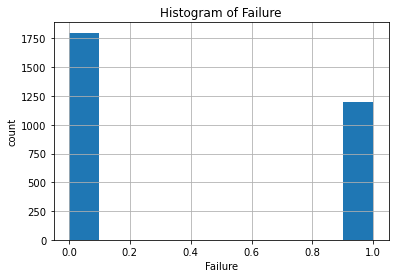

In [14]:
df['Failure'].hist()
plt.title('Histogram of Failure')
plt.ylabel('count')
plt.xlabel('Failure');
plt.show()

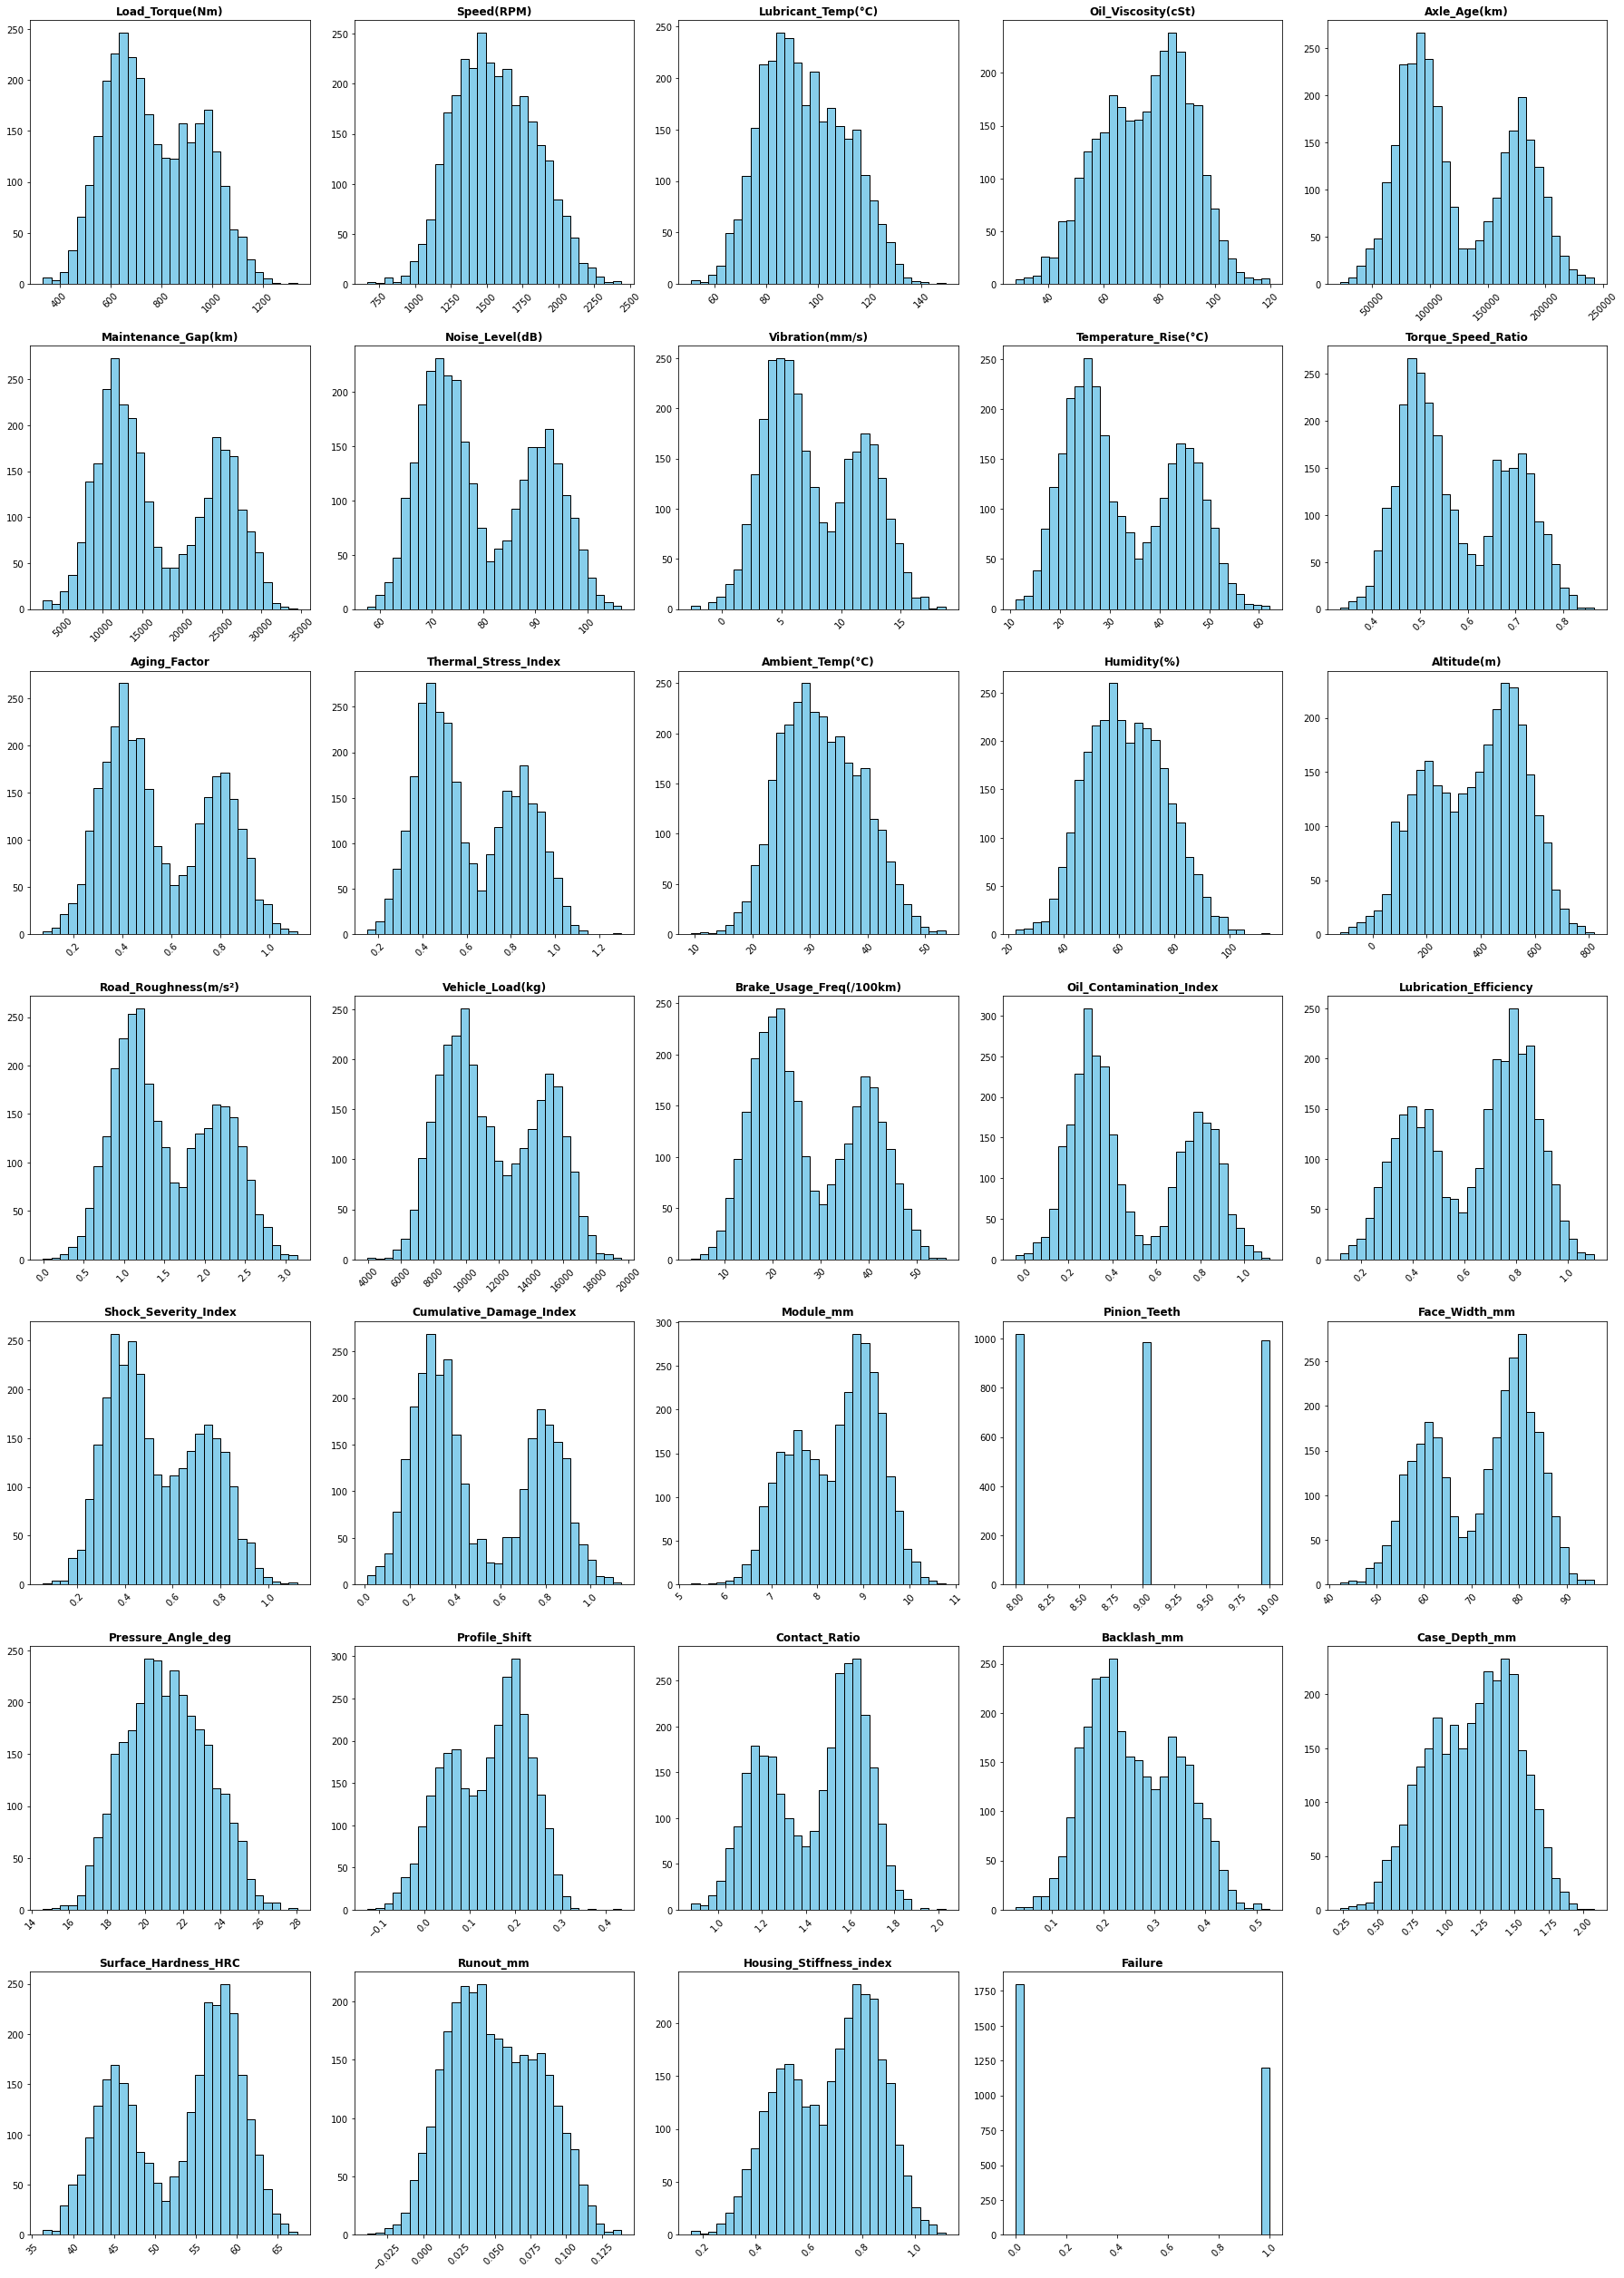

In [15]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set number of rows and columns for the subplot grid
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5*n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
# Turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

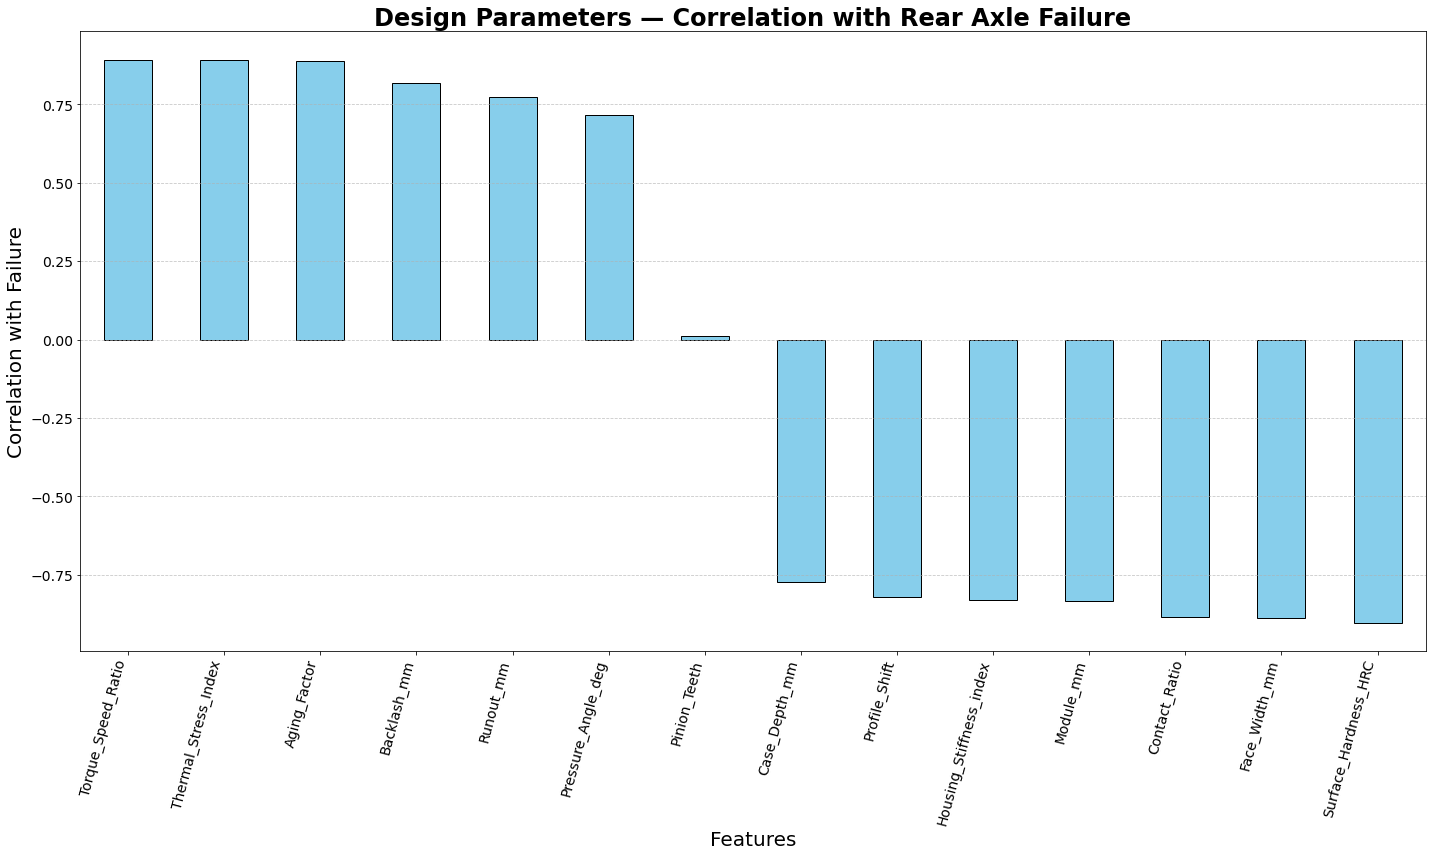

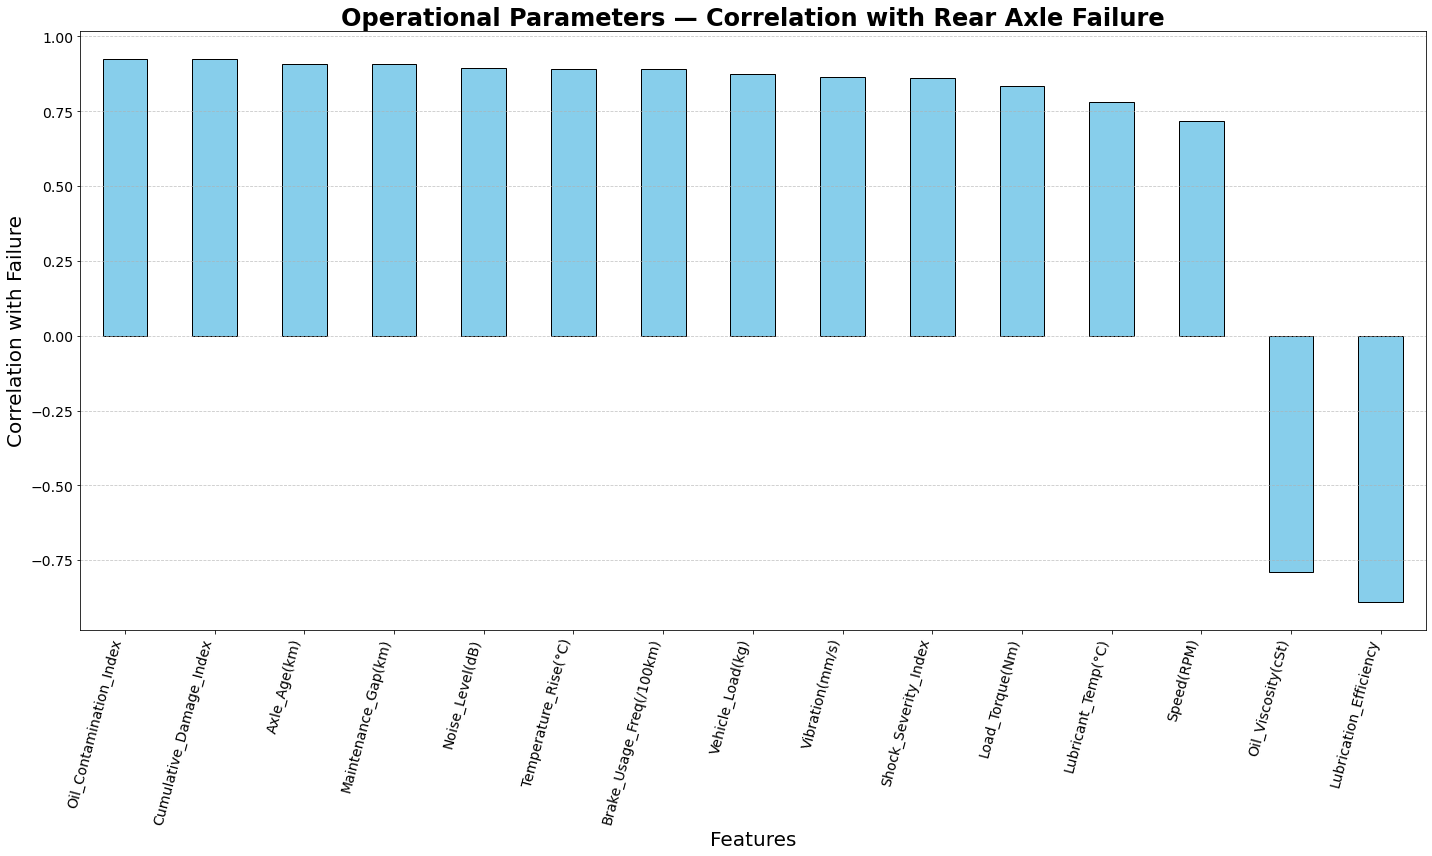

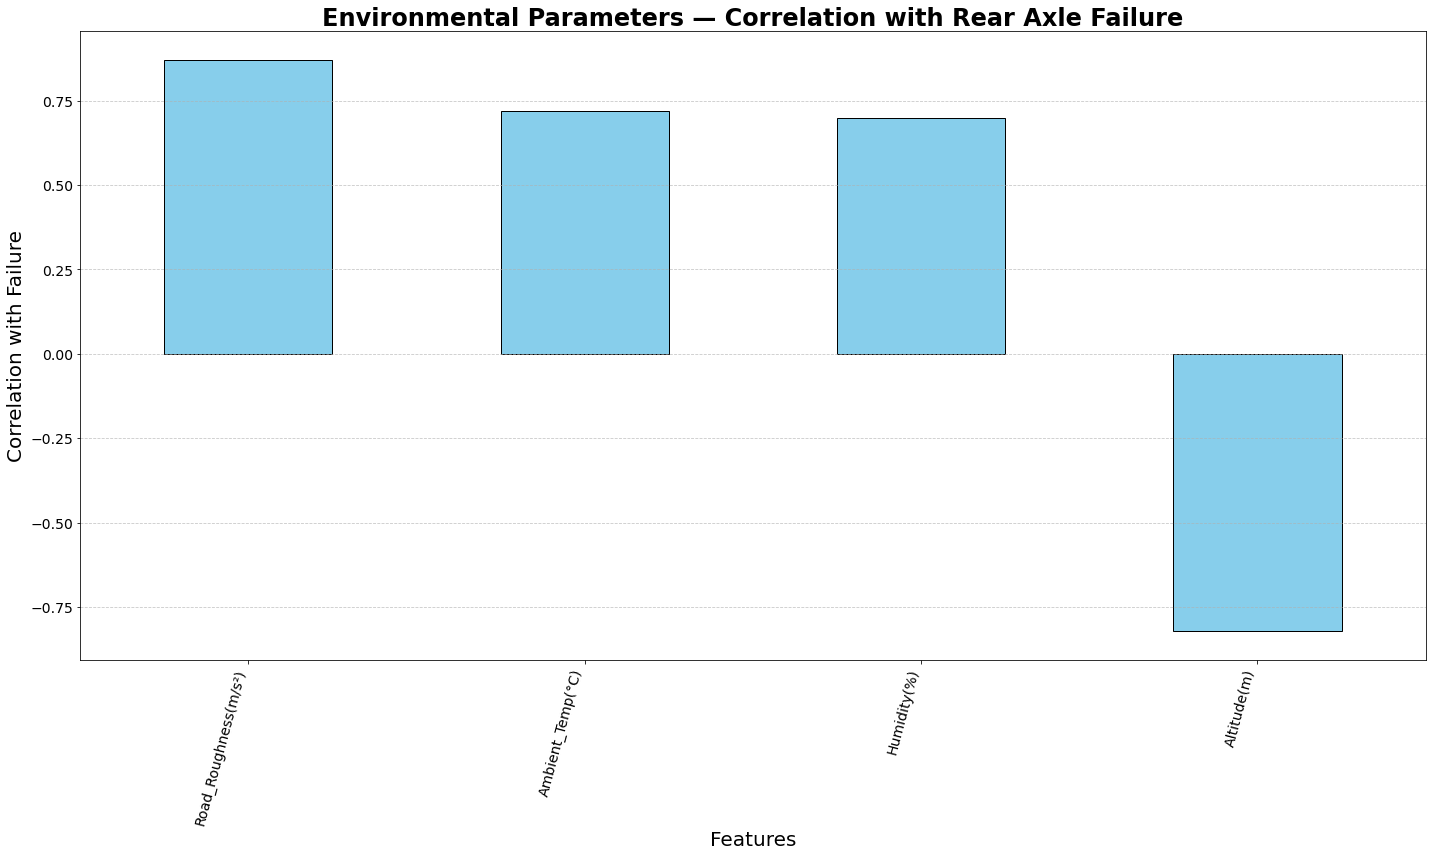

In [16]:

# --- Define feature groups ---
design_cols = [
    'Module_mm', 'Pinion_Teeth', 'Face_Width_mm', 'Pressure_Angle_deg', 'Profile_Shift',
    'Contact_Ratio', 'Backlash_mm', 'Case_Depth_mm', 'Surface_Hardness_HRC',
    'Runout_mm', 'Housing_Stiffness_index', 'Torque_Speed_Ratio', 'Aging_Factor',
    'Thermal_Stress_Index'
]

operational_cols = [
    'Load_Torque(Nm)', 'Speed(RPM)', 'Vehicle_Load(kg)', 'Lubricant_Temp(°C)',
    'Oil_Viscosity(cSt)', 'Oil_Contamination_Index', 'Lubrication_Efficiency',
    'Maintenance_Gap(km)', 'Brake_Usage_Freq(/100km)', 'Noise_Level(dB)',
    'Vibration(mm/s)', 'Shock_Severity_Index', 'Axle_Age(km)',
    'Cumulative_Damage_Index', 'Temperature_Rise(°C)'
]

environmental_cols = [
    'Ambient_Temp(°C)', 'Humidity(%)', 'Altitude(m)', 'Road_Roughness(m/s²)'
]

# --- Function to plot correlation with Failure ---
def plot_group_corr(df, cols, title):
    valid_cols = [c for c in cols if c in df.select_dtypes(include=['number']).columns]
    if not valid_cols:
        print(f"⚠️ No numeric columns found for {title}")
        return
    
    numeric_df = df[valid_cols + ['Failure']].dropna(subset=['Failure'])
    corr_with_failure = numeric_df.drop('Failure', axis=1).apply(lambda x: x.corr(numeric_df['Failure']))
    corr_with_failure = corr_with_failure.sort_values(ascending=False)

    plt.figure(figsize=(20, 12))
    corr_with_failure.plot.bar(color='skyblue', edgecolor='black')
    plt.xlabel("Features", fontsize=20)
    plt.ylabel("Correlation with Failure", fontsize=20)
    plt.title(f"{title} — Correlation with Rear Axle Failure", fontsize=24, fontweight='bold')
    plt.xticks(rotation=75, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Generate plots for each group ---
plot_group_corr(df, design_cols, "Design Parameters")
plot_group_corr(df, operational_cols, "Operational Parameters")
plot_group_corr(df, environmental_cols, "Environmental Parameters")

<AxesSubplot:xlabel='Failure', ylabel='Vehicle_Load(kg)'>

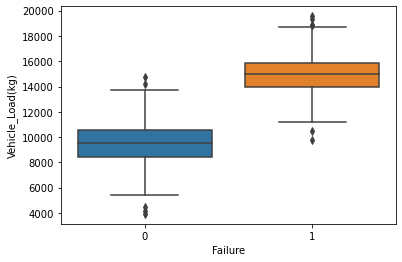

In [17]:
sns.boxplot(x='Failure', y='Vehicle_Load(kg)', data=df)

🔥 Top 25 Important Features with Feature Type:
                     Feature  Abs_Correlation   Feature_Type
0    Oil_Contamination_Index         0.925895    Operational
1    Cumulative_Damage_Index         0.923986    Operational
2               Axle_Age(km)         0.909155    Operational
3        Maintenance_Gap(km)         0.907897    Operational
4       Surface_Hardness_HRC         0.902885         Design
5            Noise_Level(dB)         0.893932    Operational
6         Torque_Speed_Ratio         0.892958         Design
7       Temperature_Rise(°C)         0.891691    Operational
8     Lubrication_Efficiency         0.890934    Operational
9       Thermal_Stress_Index         0.890838         Design
10  Brake_Usage_Freq(/100km)         0.889969    Operational
11             Face_Width_mm         0.888932         Design
12              Aging_Factor         0.887765         Design
13             Contact_Ratio         0.886085         Design
14          Vehicle_Load(kg)         0

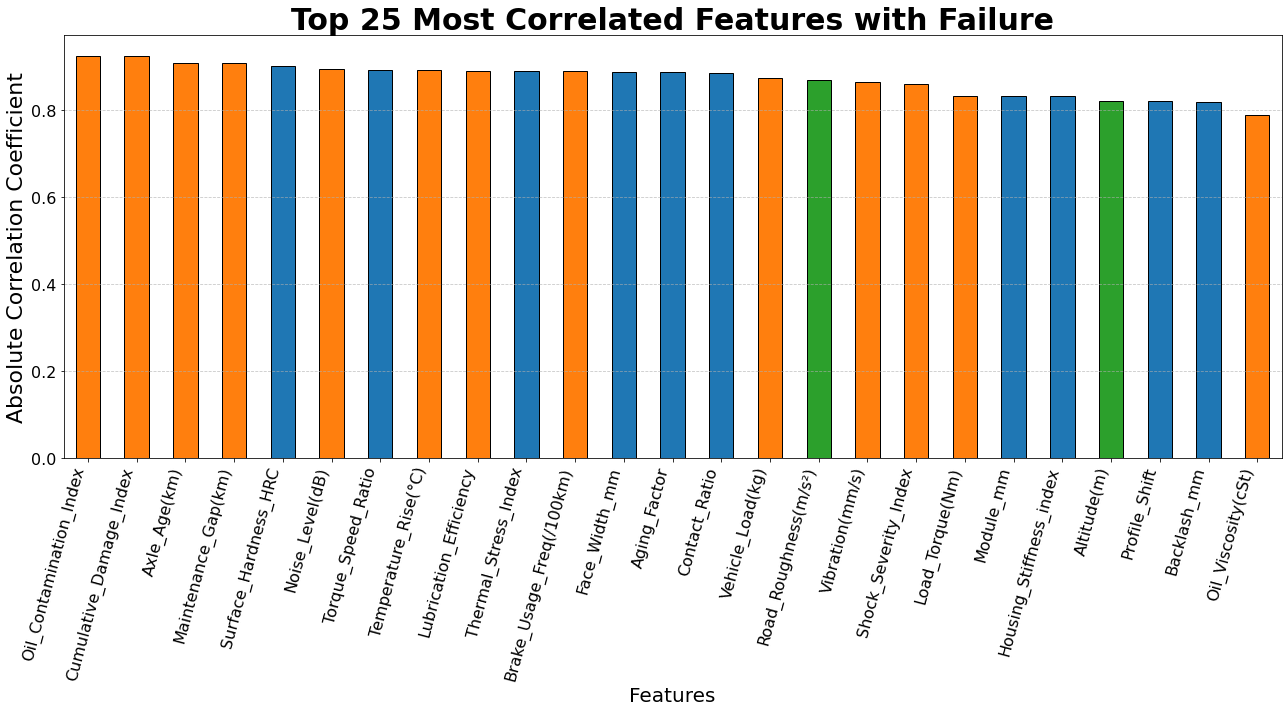

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Define feature groups ---
design_cols = [
    'Module_mm', 'Pinion_Teeth', 'Face_Width_mm', 'Pressure_Angle_deg', 'Profile_Shift',
    'Contact_Ratio', 'Backlash_mm', 'Case_Depth_mm', 'Surface_Hardness_HRC',
    'Runout_mm', 'Housing_Stiffness_index', 'Torque_Speed_Ratio', 'Aging_Factor',
    'Thermal_Stress_Index'
]

operational_cols = [
    'Load_Torque(Nm)', 'Speed(RPM)', 'Vehicle_Load(kg)', 'Lubricant_Temp(°C)',
    'Oil_Viscosity(cSt)', 'Oil_Contamination_Index', 'Lubrication_Efficiency',
    'Maintenance_Gap(km)', 'Brake_Usage_Freq(/100km)', 'Noise_Level(dB)',
    'Vibration(mm/s)', 'Shock_Severity_Index', 'Axle_Age(km)',
    'Cumulative_Damage_Index', 'Temperature_Rise(°C)'
]

environmental_cols = [
    'Ambient_Temp(°C)', 'Humidity(%)', 'Altitude(m)', 'Road_Roughness(m/s²)'
]

# --- Combine and select only numeric columns ---
all_cols = design_cols + operational_cols + environmental_cols
valid_cols = [c for c in all_cols if c in df.select_dtypes(include=['number']).columns]

# --- Compute correlation ---
numeric_df = df[valid_cols + ['Failure']].dropna(subset=['Failure'])
Corrdf = numeric_df.drop('Failure', axis=1).apply(lambda x: x.corr(numeric_df['Failure']))

# --- Sort by absolute correlation (strongest to weakest) ---
Corr_abs = Corrdf.abs().sort_values(ascending=False)
top25 = Corr_abs.head(25)

# --- Prepare a DataFrame with feature type ---
def get_feature_type(feature):
    if feature in design_cols:
        return 'Design'
    elif feature in operational_cols:
        return 'Operational'
    elif feature in environmental_cols:
        return 'Environmental'
    else:
        return 'Other'

top25_df = pd.DataFrame({
    'Feature': top25.index,
    'Abs_Correlation': top25.values
})
top25_df['Feature_Type'] = top25_df['Feature'].apply(get_feature_type)

# --- Print top 25 features ---
print("🔥 Top 25 Important Features with Feature Type:")
print(top25_df)

# --- Plot ---
plt.figure(figsize=(18, 10))
colors = ['#1f77b4' if ft == 'Design' else '#ff7f0e' if ft == 'Operational' else '#2ca02c' 
          for ft in top25_df['Feature_Type']]
top25_df.set_index('Feature')['Abs_Correlation'].plot(kind='bar', color=colors, edgecolor='black')
plt.title("Top 25 Most Correlated Features with Failure", fontsize=30, fontweight='bold')
plt.xlabel("Features", fontsize=20)
plt.ylabel("Absolute Correlation Coefficient", fontsize=22)
plt.xticks(rotation=75, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
df.shape

(3000, 40)

In [20]:
# List of top 25 feature names
top25_features = top25.index.tolist()
print(top25_features)

['Oil_Contamination_Index', 'Cumulative_Damage_Index', 'Axle_Age(km)', 'Maintenance_Gap(km)', 'Surface_Hardness_HRC', 'Noise_Level(dB)', 'Torque_Speed_Ratio', 'Temperature_Rise(°C)', 'Lubrication_Efficiency', 'Thermal_Stress_Index', 'Brake_Usage_Freq(/100km)', 'Face_Width_mm', 'Aging_Factor', 'Contact_Ratio', 'Vehicle_Load(kg)', 'Road_Roughness(m/s²)', 'Vibration(mm/s)', 'Shock_Severity_Index', 'Load_Torque(Nm)', 'Module_mm', 'Housing_Stiffness_index', 'Altitude(m)', 'Profile_Shift', 'Backlash_mm', 'Oil_Viscosity(cSt)']


In [21]:
import pandas as pd

def correlation(df, threshold=0.7):
    """
    Returns a list of features that are highly correlated with each other.
    
    Parameters:
    df : pd.DataFrame
        Input DataFrame containing only numeric features.
    threshold : float
        Absolute correlation threshold to flag features.
    
    Returns:
    correlated_features : list
        List of features to consider dropping due to high correlation.
    """
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    
    correlated_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return correlated_features

# --- Example usage ---
import numpy as np

# Use only numeric features (top 25 or all valid features)
X = numeric_df[top25_df['Feature'].tolist()]  # or numeric_df[valid_cols]

corr_features = correlation(X, threshold=0.7)
print("⚡ Highly correlated features (multicollinearity) with threshold 0.7:")
print(corr_features)
print("Total features to check/drop:", len(set(corr_features)))

⚡ Highly correlated features (multicollinearity) with threshold 0.7:
['Cumulative_Damage_Index', 'Axle_Age(km)', 'Maintenance_Gap(km)', 'Surface_Hardness_HRC', 'Noise_Level(dB)', 'Torque_Speed_Ratio', 'Temperature_Rise(°C)', 'Lubrication_Efficiency', 'Thermal_Stress_Index', 'Brake_Usage_Freq(/100km)', 'Face_Width_mm', 'Aging_Factor', 'Contact_Ratio', 'Vehicle_Load(kg)', 'Road_Roughness(m/s²)', 'Vibration(mm/s)', 'Shock_Severity_Index', 'Load_Torque(Nm)', 'Module_mm', 'Housing_Stiffness_index', 'Altitude(m)', 'Profile_Shift', 'Backlash_mm', 'Oil_Viscosity(cSt)']
Total features to check/drop: 24


In [22]:
df.shape

(3000, 40)

In [23]:
import pandas as pd
import os

# --- Define categorical features ---
categorical_cols = [
    'Road_Type', 'Shock_Load', 'Dust_Level', 'Rain_Exposure', 'Load_Factor', 'Material_Grade'
]

# --- Define numeric features (excluding four to remove) ---
numeric_cols = [
    'Cumulative_Damage_Index', 
    'Thermal_Stress_Index', 'Temperature_Rise(°C)', 'Shock_Severity_Index', 
    'Vibration(mm/s)', 'Lubrication_Efficiency', 'Noise_Level(dB)', 
    'Pinion_Teeth', 'Ambient_Temp(°C)', 'Contact_Ratio', 'Humidity(%)',
    'Speed(RPM)', 'Module_mm', 'Face_Width_mm', 'Maintenance_Gap(km)',
    'Housing_Stiffness_index', 'Load_Torque(Nm)', 'Road_Roughness(m/s²)',
    'Lubricant_Temp(°C)', 'Torque_Speed_Ratio', 'Vehicle_Load(kg)', 
    'Oil_Contamination_Index', 'Oil_Viscosity(cSt)', 'Case_Depth_mm', 'Aging_Factor'
]

# --- Combine categorical + numeric features ---
selected_cols = categorical_cols + numeric_cols

# --- Include response column ---
response_col = 'Failure'
selected_cols_with_response = selected_cols + [response_col]

# --- Create new dataset ---
new_df = df[selected_cols_with_response].copy()

# --- Specify full file path to save ---
# Change this path to your desired folder
file_path = r"D:\\Test\\rear_axle_failure_selected_features_Up.csv"

# --- Save to CSV ---
new_df.to_csv(file_path, index=False)

print(f"✅ Dataset created and saved successfully at:\n{file_path}")
print(f"Shape of dataset: {new_df.shape}")
print(f"Columns included:\n{new_df.columns.tolist()}")

✅ Dataset created and saved successfully at:
D:\\Test\\rear_axle_failure_selected_features_Up.csv
Shape of dataset: (3000, 32)
Columns included:
['Road_Type', 'Shock_Load', 'Dust_Level', 'Rain_Exposure', 'Load_Factor', 'Material_Grade', 'Cumulative_Damage_Index', 'Thermal_Stress_Index', 'Temperature_Rise(°C)', 'Shock_Severity_Index', 'Vibration(mm/s)', 'Lubrication_Efficiency', 'Noise_Level(dB)', 'Pinion_Teeth', 'Ambient_Temp(°C)', 'Contact_Ratio', 'Humidity(%)', 'Speed(RPM)', 'Module_mm', 'Face_Width_mm', 'Maintenance_Gap(km)', 'Housing_Stiffness_index', 'Load_Torque(Nm)', 'Road_Roughness(m/s²)', 'Lubricant_Temp(°C)', 'Torque_Speed_Ratio', 'Vehicle_Load(kg)', 'Oil_Contamination_Index', 'Oil_Viscosity(cSt)', 'Case_Depth_mm', 'Aging_Factor', 'Failure']


In [24]:
new_df.shape

(3000, 32)

In [25]:
import pandas as pd
import os

# --- Define categorical features ---
categorical_cols = [
    'Road_Type', 'Dust_Level', 'Rain_Exposure', 'Material_Grade'
]

# --- Define numeric features (excluding four to remove) ---
numeric_cols = [
    'Cumulative_Damage_Index', 
    'Thermal_Stress_Index', 'Temperature_Rise(°C)', 'Shock_Severity_Index', 
    'Vibration(mm/s)', 'Lubrication_Efficiency', 'Noise_Level(dB)', 
    'Pinion_Teeth', 'Ambient_Temp(°C)', 'Contact_Ratio', 'Humidity(%)',
    'Speed(RPM)', 'Module_mm', 'Face_Width_mm', 'Maintenance_Gap(km)',
    'Housing_Stiffness_index', 'Load_Torque(Nm)', 'Road_Roughness(m/s²)',
    'Lubricant_Temp(°C)', 'Torque_Speed_Ratio', 'Vehicle_Load(kg)', 
    'Oil_Contamination_Index', 'Oil_Viscosity(cSt)', 'Case_Depth_mm', 'Aging_Factor'
]

# --- Combine categorical + numeric features ---
selected_cols = categorical_cols + numeric_cols

# --- Include response column ---
response_col = 'Failure'
selected_cols_with_response = selected_cols + [response_col]

# --- Create new dataset ---
new_df = df[selected_cols_with_response].copy()

# --- Apply One-Hot Encoding for categorical features ---
df_encoded = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)

# --- Move 'Failure' column to the end ---
cols = [c for c in df_encoded.columns if c != response_col] + [response_col]
df_encoded = df_encoded[cols]

# --- Specify full file path to save ---
file_path_encoded = r"D:\\Test\\rear_axle_failure_encoded_features_Up.csv"

# --- Save the encoded dataset ---
df_encoded.to_csv(file_path_encoded, index=False)

print(f"✅ Encoded dataset created and saved successfully at:\n{file_path_encoded}")
print(f"Shape of encoded dataset: {df_encoded.shape}")
print(f"Columns included:\n{df_encoded.columns.tolist()}")

✅ Encoded dataset created and saved successfully at:
D:\\Test\\rear_axle_failure_encoded_features_Up.csv
Shape of encoded dataset: (3000, 34)
Columns included:
['Cumulative_Damage_Index', 'Thermal_Stress_Index', 'Temperature_Rise(°C)', 'Shock_Severity_Index', 'Vibration(mm/s)', 'Lubrication_Efficiency', 'Noise_Level(dB)', 'Pinion_Teeth', 'Ambient_Temp(°C)', 'Contact_Ratio', 'Humidity(%)', 'Speed(RPM)', 'Module_mm', 'Face_Width_mm', 'Maintenance_Gap(km)', 'Housing_Stiffness_index', 'Load_Torque(Nm)', 'Road_Roughness(m/s²)', 'Lubricant_Temp(°C)', 'Torque_Speed_Ratio', 'Vehicle_Load(kg)', 'Oil_Contamination_Index', 'Oil_Viscosity(cSt)', 'Case_Depth_mm', 'Aging_Factor', 'Road_Type_Off-road', 'Road_Type_Rough', 'Dust_Level_Low', 'Dust_Level_Medium', 'Rain_Exposure_Low', 'Rain_Exposure_Medium', 'Material_Grade_Low', 'Material_Grade_Medium', 'Failure']


In [26]:
# Get the newly created features after one-hot encoding
encoded_features = [col for col in df_encoded.columns if col not in numeric_cols + ['Failure']]
print("🔥 Newly created features from one-hot encoding:")
print(encoded_features)
print(f"Total new features: {len(encoded_features)}")

🔥 Newly created features from one-hot encoding:
['Road_Type_Off-road', 'Road_Type_Rough', 'Dust_Level_Low', 'Dust_Level_Medium', 'Rain_Exposure_Low', 'Rain_Exposure_Medium', 'Material_Grade_Low', 'Material_Grade_Medium']
Total new features: 8


In [27]:
df_encoded.shape

(3000, 34)